# Project 3: Regression

## Introduction

### Regression models work by finding relationships between one or more input variables (features) and an output variable (target). They analyze patterns in the data to estimate how changes in the inputs affect the output. The model then fits a function, often a line or curve that best minimizes the difference between predicted and actual values, usually measured with metrics like root mean squared error (RMSE). Once trained, the model can use new input data to predict outcomes based on those learned relationships. Overall, regression models are used to understand trends, make predictions, and quantify how strongly variables are related.


### The rise of music streaming platforms has made data an essential part of understanding what makes a song popular. By analyzing musical features such as mode, energy, danceability,  loudness, etc we can uncover patterns that influence listener engagement. Predicting song streams using these features can help artists and record labels make more informed creative and marketing decisions. Businesses can use these predictions to focus promotion on songs with higher streaming potential, improving exposure and profitability. This type of regression modeling bridges creativity with analytics, offering valuable insight into how measurable musical traits relate to commercial success.

### In this project, we explore three types of regression models: linear, tree-based, and K-Nearest Neighbors (KNN). We evaluate their performance by comparing there root mean squared error (RMSE) values to determine which model provides the most accurate predictions. Root mean sqaure error is an accuracy metric that measures the average root sqaured difference between a predicted value and the actual value in the dataset, as such the lower the score the more accurate the model predicts. 


## Imports

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

## Data

#### The data used for modeling is from a kaggle dataset titled Most Streamed Spotify Songs 2023 (link - https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023). The dataset came from pulling the top songs of 2023 by streams using the Spotifiy API. It pulled information on each songs stream count and its musical makeup that consist of mode, danceability_%, valence_% ,  energy_%, acousticness_%, instrumentalness_%, 'liveness_%, and 'speechiness_%. These features are at the focus for our modeling with the dataset containing the top 943 songs streamed on spotify in 2023. 



Importing my dataset as a csv

In [218]:
raw_songs_df = pd.read_csv("spotify-2023.csv", encoding="latin1")

### Data Pre Processing

Getting a view of what the dataframe is formatted as

In [219]:
raw_songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Checking for nulls and datatypes

In [220]:
raw_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Checking for null counts

In [221]:
raw_songs_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Due the fact that in_shazam_charts and key features are not vital for our expriements so we will drop those columns

In [222]:
raw_songs_df.drop(columns=['in_shazam_charts'], inplace=True)
raw_songs_df.drop(columns=['key'], inplace=True)

After removing our nulls we will format our data to only have the features we need. Only keeping mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%, streams


In [223]:
songs_df = raw_songs_df[['mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']]

To ensure that our data is standardized and is able to be used in regression models we will encode the mode feature to be 0 for minor and 1 for major

In [224]:
size_mapping = {'Minor': 0, 'Major': 1}
songs_df['mode_Encoded_Map'] = songs_df['mode'].map(size_mapping)
songs_df.drop(columns=['mode'], inplace=True)

/var/folders/5s/zhk248fj34153byjj3qy77tm0000gn/T/ipykernel_23399/1504296525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df['mode_Encoded_Map'] = songs_df['mode'].map(size_mapping)
/var/folders/5s/zhk248fj34153byjj3qy77tm0000gn/T/ipykernel_23399/1504296525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df.drop(columns=['mode'], inplace=True)


Ensuring the our data is now standarizdized

In [225]:
songs_df.dtypes

#converting streams to numerical
songs_df['streams'] = pd.to_numeric(songs_df['streams'], errors='coerce')
songs_df = songs_df.dropna(subset=['streams'])
songs_df.dtypes

/var/folders/5s/zhk248fj34153byjj3qy77tm0000gn/T/ipykernel_23399/499109797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df['streams'] = pd.to_numeric(songs_df['streams'], errors='coerce')


danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
streams               float64
mode_Encoded_Map        int64
dtype: object

## Data Visualization

### Correlation Heatmap

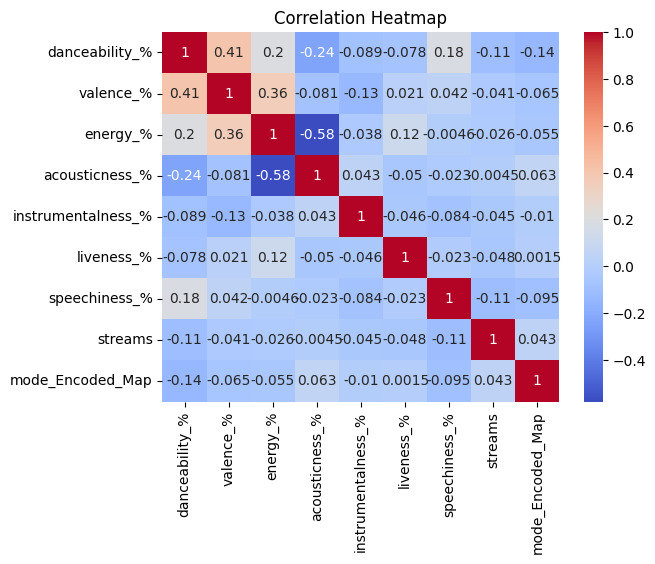

In [226]:
#lets avoid using string features for our correlation heatmap
sns.heatmap(songs_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap above showcases that our data set does not seem to suffer from multicollinearity, as none of the features seem to be highly correlated to each other. However, it also seems that none of the features seem to correlate with streams. This isn’t necessarily a problem, as there could be trends and patterns that reveal themselves using regression models that don’t rely on heavy correlation between the features and streams. 


Due to the lack of correlation between features and streams, it is essential to look at the individual relationship between each feature and streams to see what sort of relationships and patterns can be noticed at a glance. 


### Relation Charts between Streams and Musical features

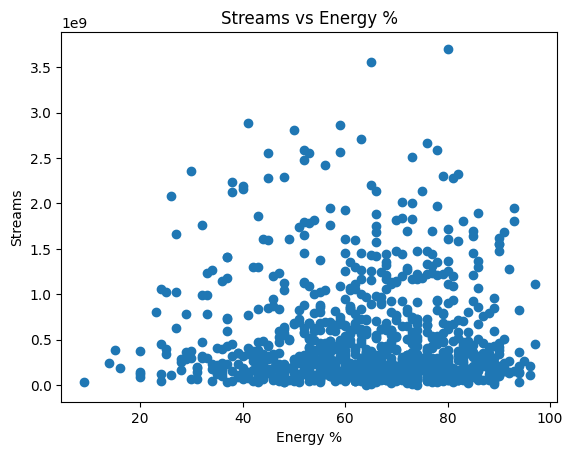

In [227]:
#Creating a chart of actual streams vs energy_%
plt.scatter(songs_df['energy_%'], songs_df['streams'])
plt.xlabel('Energy %')
plt.ylabel('Streams')
plt.title('Streams vs Energy %')
plt.show()

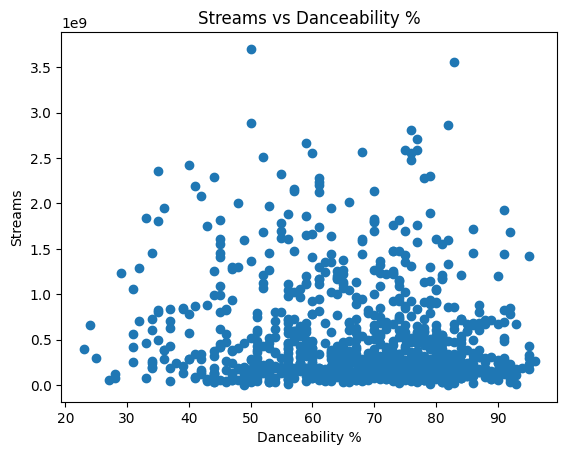

In [228]:
#Creating a chart of actual streams vs danceability_%
plt.scatter(songs_df['danceability_%'], songs_df['streams'])
plt.xlabel('Danceability %')
plt.ylabel('Streams')
plt.title('Streams vs Danceability %')
plt.show()

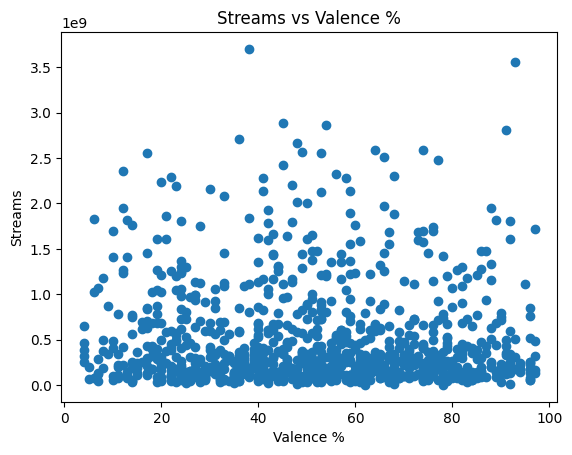

In [229]:
#Creating a chart of actual streams vs valence_%
plt.scatter(songs_df['valence_%'], songs_df['streams'])
plt.xlabel('Valence %')
plt.ylabel('Streams')
plt.title('Streams vs Valence %')
plt.show()

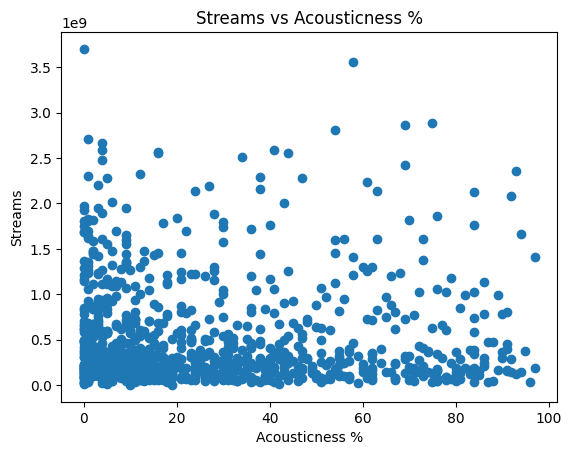

In [230]:
#Creating a chart of a actual streams vs acousticness_%
plt.scatter(songs_df['acousticness_%'], songs_df['streams'])
plt.xlabel('Acousticness %')
plt.ylabel('Streams')
plt.title('Streams vs Acousticness %')
plt.show()

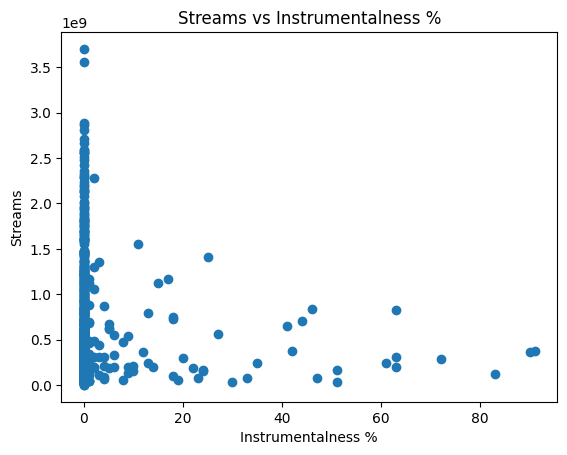

In [231]:
#Creating a chart of acutual streams vs instrumentalness_%
plt.scatter(songs_df['instrumentalness_%'], songs_df['streams'])
plt.xlabel('Instrumentalness %')
plt.ylabel('Streams')
plt.title('Streams vs Instrumentalness %')
plt.show()

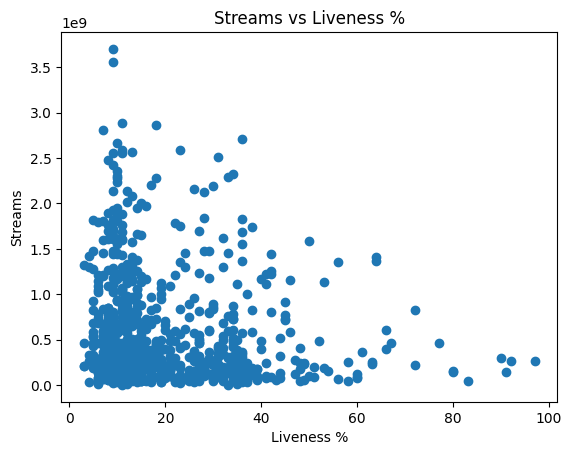

In [232]:
#Creating a chart of actual streams vs liveness_%
plt.scatter(songs_df['liveness_%'], songs_df['streams'])
plt.xlabel('Liveness %')
plt.ylabel('Streams')
plt.title('Streams vs Liveness %')
plt.show()

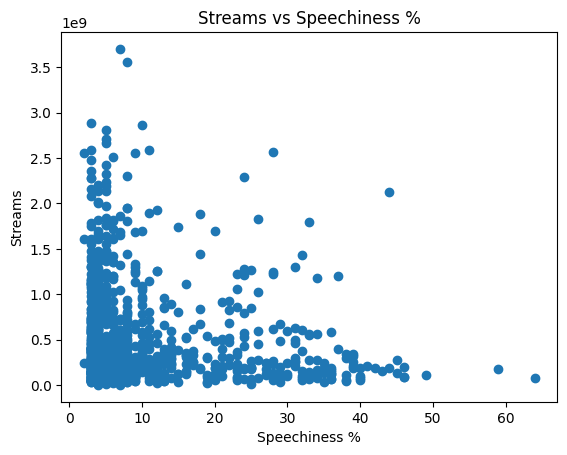

In [233]:
#Creating a chart of actual streams vs speechiness_%
plt.scatter(songs_df['speechiness_%'], songs_df['streams'])
plt.xlabel('Speechiness %')
plt.ylabel('Streams')
plt.title('Streams vs Speechiness %')
plt.show()

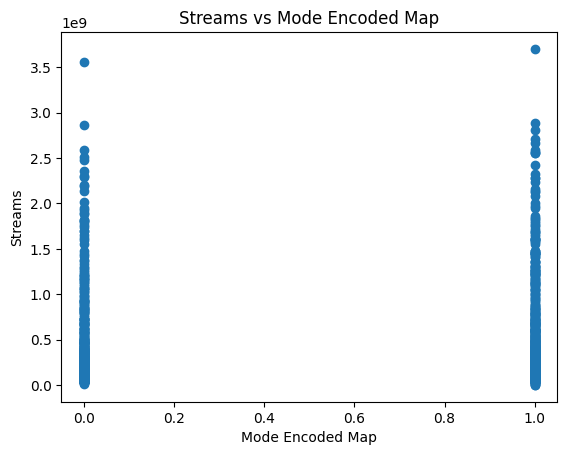

In [234]:
#Creating a chart of actual streams vs mode_Encoded_Map%
plt.scatter(songs_df['mode_Encoded_Map'], songs_df['streams'])
plt.xlabel('Mode Encoded Map')
plt.ylabel('Streams')
plt.title('Streams vs Mode Encoded Map')
plt.show()

The independent relationship charts seemed to showcase some interesting patterns for the features speechiness, liveliness, and instrumentalness. We saw that a lot of these features were skewed to the low values of these features. This could be useful in regression analysis when deciding on what model to use and what features to cut back on. However, the rest of features did not seem showcase glaring patterns when analysisng their relationships, and need further processing or anaylsis to find a useful relationship.


# First Experiment

For the first experiment we wanted to get a baseline performance by using a rather simple regression model, multi-variable linear regression. Linear regression is a regression model that predicts a value by using a best fit. The line is drawn the least squares method which minimizes the distance between the predicted values and the actual data points. The line is an equation expressed as y = b1 + b2 +… bn + c. Where each bn represents the coefficient of each feature being used to predict streams and c is a constant value presented even when all b values are 0, and y being the final values of streams predicted. For our model we will find the coefficients for our feature sets after modeling.  
However, as mentioned our data did not seem to highly correlate with stream values. This is quite a setback for a simple model as linear regression that can rely heavily on correlation between its features and target. It is still a sophisticated model that can be used for a baseline. 

Getting our prediction target 'streams' and then feature set used for predictions

In [235]:
y = songs_df['streams']                
X = songs_df.drop(columns=['streams'])  


Training and testing our data for our model and calculating our coeffecients for our regression equation

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")


Intercept: 944482427.0832744
Coefficient: [-3899200.86102435   948699.3280555   -772625.55506446  -960768.29706927
 -3844625.73086608 -3304048.40024199 -7075889.03234012  7619504.15174988]


Here we see the intercept and coefficients for each feature in our linear regression model. So our eqatution for predicting streams based on our features would be: 
Streams = 944482427.0832744 + (danceability_% * -3899200.86102435) + (valence_% * 948699.3280555) + (energy_% * 772625.55506446) + (acousticness_% * -960768.29706927) + (instrumentalness_% * -3844625.73086608) + (liveness_% * 3304048.40024199) + (speechiness_% * 7075889.03234012) + (mode_Encoded_Map * 7619504.15174988)

The model now ready for prediction we can see graph our regression line and plot the actual stream values

           Actual     Predicted
199  1.479115e+09  6.271147e+08
420  7.848982e+07  3.642777e+08
695  1.439191e+09  8.564760e+08
751  1.069331e+08  3.315134e+08
507  1.309887e+09  6.148618e+08


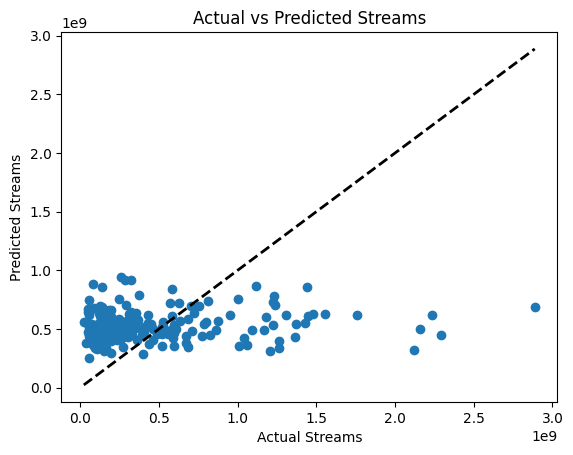

In [262]:
# Predict streams for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

# Displaying a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

Calculating Accuracy Metrics

In [263]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate RMSE score
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 2.5349018248099696e+17
Root Mean Squared Error: 503478085.4029269


On average each stream prediction was off by 503478085.4029269 streams. The simple linear regression model resulted in a relatively high root mean squared error (RMSE), indicating that it struggled to accurately capture the variability in the data. This outcome was expected, as linear regression assumes a strictly linear relationship between features and the target variable, which may not fully represent the underlying patterns in our dataset. Despite the higher error, the model serves as a useful baseline for comparison, allowing us to evaluate the effectiveness of more complex models, such as regression trees or ensemble methods, in improving prediction accuracy.


## Second Experiment

With the first experiment, we were unable to explain a majority of the variability in the dataset. This was expected due to its simplistic nature. We also noted that the lack of correlation between the feature set and stream was lacking, as such, we can turn more complex regression model that could find underlying patterns between the feature set and streams. Turning to tree-based regression. In tree-based regression, no longer relies on a linear assumption in predicting streams. The tree instead recursively splits data into smaller groups based on the features that help reduce the RMSE until a final node is reached and prediction is calculated. 


Getting our prediction target 'streams' and then feature set used for predictions

In [239]:
y = songs_df['streams']                
X = songs_df.drop(columns=['streams'])  

Training and testing our dataset and fitting it to the tree model

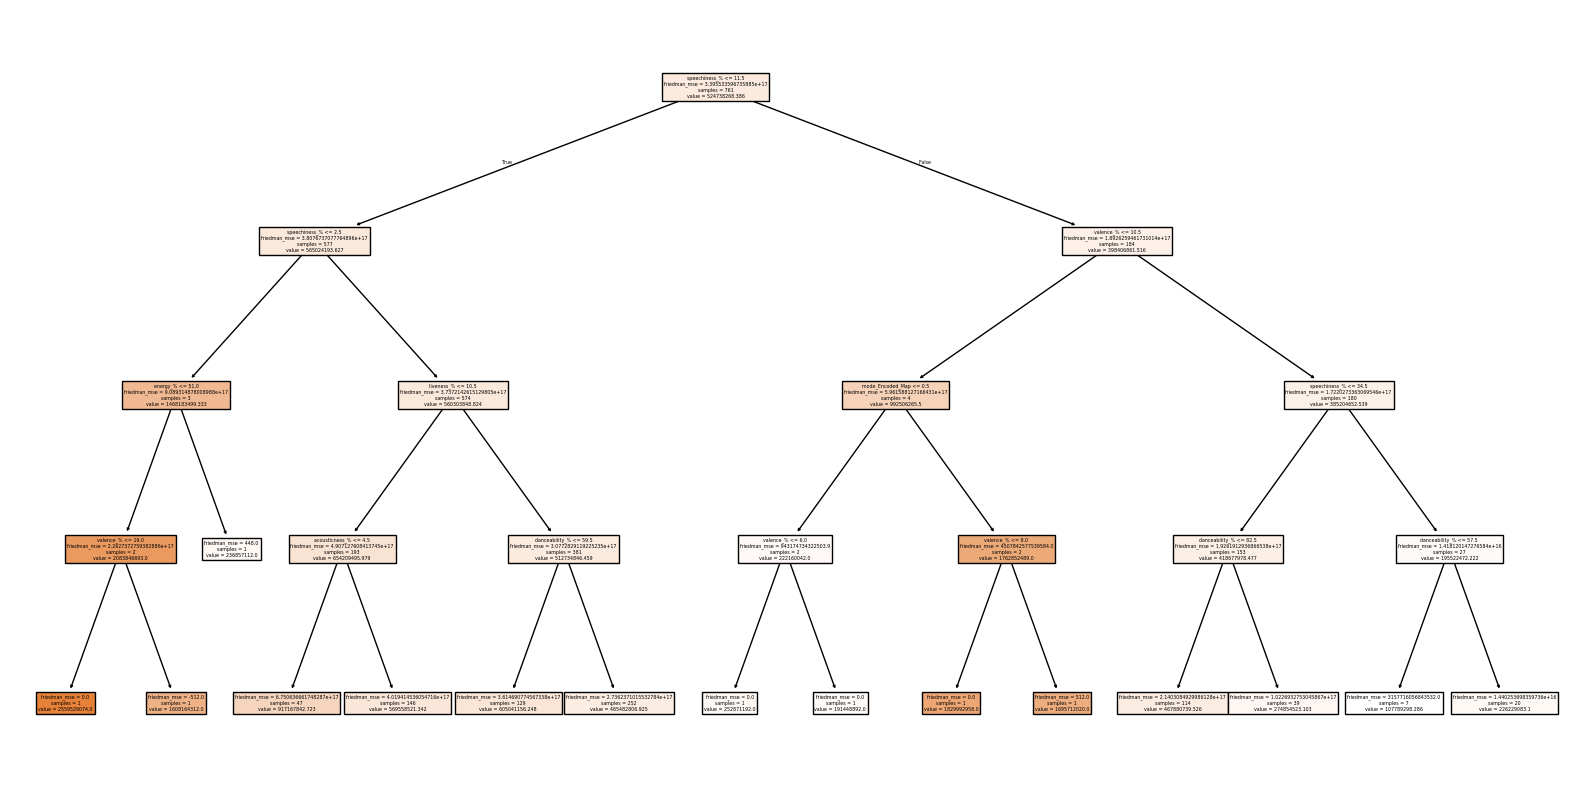

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Since we are using MSE for accuracy we will use the friedman_mse criterion
model = DecisionTreeRegressor(criterion = "friedman_mse", max_depth=4)
model.fit(X_train, y_train)
#Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()


The figure above showcases the process in which the regression tree splits the data step by step. Starting from the root, the model divides the data based on the features that best reduce error (MSE), continuing this process until it reaches the end nodes that give the final stream predictions.


Calculating Accuracy Metrics

In [241]:
#Predict streams for the test set
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate RMSE score
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 2.472179015987894e+17
Root Mean Squared Error: 497210118.1580976


#### Interpeting Result

On average each stream prediction was off by 497210118.1580976 streams. We believe that the regression tree model performed better than the linear regression model because it was able to capture the nonlinear patterns and interactions present in the data that the linear model could not. The tree’s flexibility made it better at handling complex feature interactions and outliers, leading to a lower root mean squared error (RMSE) compared to the linear regression. Overall, the regression tree provided a more adaptable and realistic fit for our data, which is why it achieved stronger predictive performance.


## Third Experiment

We saw that the tree regression model did significantly better than our simple linear regression model. Due the nature of tree models that allow for them to better capture complex patterns and relationships between features and target allow for a better use case of the dataset. This shows promise for the model in the focus of the third experiment.. K-Nearest Neighbors (KNN) Regression predicts a value based on the average of the target values of the k closest data points in the feature space. It’s a simple, model that works well when nearby points have similar outputs. This could prove useful when in context with our dataset as songs can share genres which naturally cluster certain songs into sharing similar musical features. KNN can benefit from this unique feature in the dataset and find an underlying pattern unqiue to certain genres in the dataset to make a better prediction.
However, it has a high reliance on the setting a proper K value. As such we will preform grid search a method used to fine tune the hyper parameters for a model by testing all possible parameter values and selecting the one that provides the best results. 

Getting our prediction target ‘streams’ and then the feature set used for prediction 

In [258]:
y = songs_df['streams']
X = songs_df.drop(columns=['streams'])

Getting our optimal K value for our model through a parameter grid search for our model using our X and y values to fit. 
Testing, training, and fitting our model using our found value for k.
Using models for predictions and finding the accuracy metrics. 

In [259]:
param_grid = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X, y)
print(f"Best number of neighbors: {grid_search.best_params_['n_neighbors']}")

Best number of neighbors: 30


Training and testing our dataset and fitting it to our model

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsRegressor(n_neighbors=30)
model.fit(X_train, y_train)

,n_neighbors,30
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Calculating Accuarcy Metrics

Mean Squared Error: 2.5125532497118925e+17
Root Mean Squared Error: 501253753.07441765


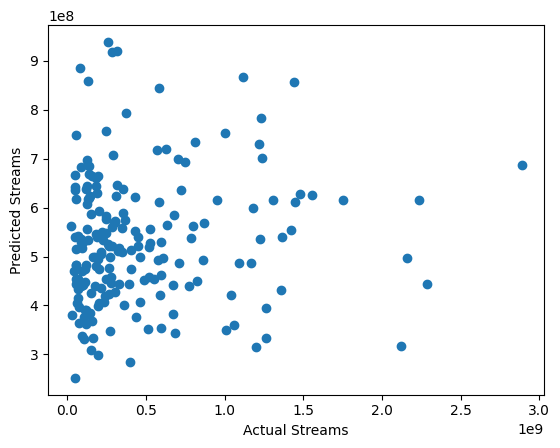

In [261]:
#Predict streams for the test set
Y_pred = model.predict(X_test)

#Creating a visualization of actual vs predicted values
plt.scatter(y_test, Y_pred)
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams') 

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate RMSE score
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

#### Interpeting Result

On average our stream prediction was by 501253753.07441765 streams. We see that our RMSE is lower than our baseline linear model but still scores higher than our tree regression model. This could be due its reliance on the distances between points, making it more sensitive to noise, irrelevant features, and data scaling. In contrast, the regression tree was better at capturing the nonlinear relationships and feature interactions by splitting the data down. As a result, the tree model was able to generalize the underlying structure of the data, leading to a lower RMSE value.

## Fourth Experiment

Our tree regression model was our best performing model, and as such we will focus on improving this model to get more accurate predictions. Running a similar parameter grid search for the regression tree in order to find optimal parameters to feed our regression tree. We will focus on finding the best max_depth, min_samples_leaf, min_samples_split, and max_features. In a regression tree model, the max_depth parameter controls how deep the tree can grow, preventing it from becoming too complex and overfitting the data. The min_samples_leaf sets the smallest number of samples that must be present in a leaf node, which helps smooth predictions and improve stability. The min_samples_split defines the minimum number of samples needed to split a node, reducing unnecessary branches, while max_features limits how many features the model considers at each split, encouraging generalization and reducing overfitting.


Getting our prediction target 'streams' and then feature set used for predictions

In [265]:
X = songs_df.drop(columns=['streams'])
y = songs_df['streams']

Training and testing our dataset

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Running the grid search for the optimal parameters to feed into the tree model

In [267]:
grid = GridSearchCV(
  DecisionTreeRegressor(random_state=42),
  {"max_depth":[3,5,7,9,None],
   "min_samples_leaf":[1,2,5,10],
   "min_samples_split":[2,5,10],
   "max_features":[None,"sqrt","log2"],
   "criterion":["friedman_mse"]
   },
  cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid.fit(X, y); best_tree = grid.best_estimator_


Fitting our training data to the best model

In [268]:
model = best_tree
model.fit(X_train, y_train)

,criterion,'friedman_mse'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


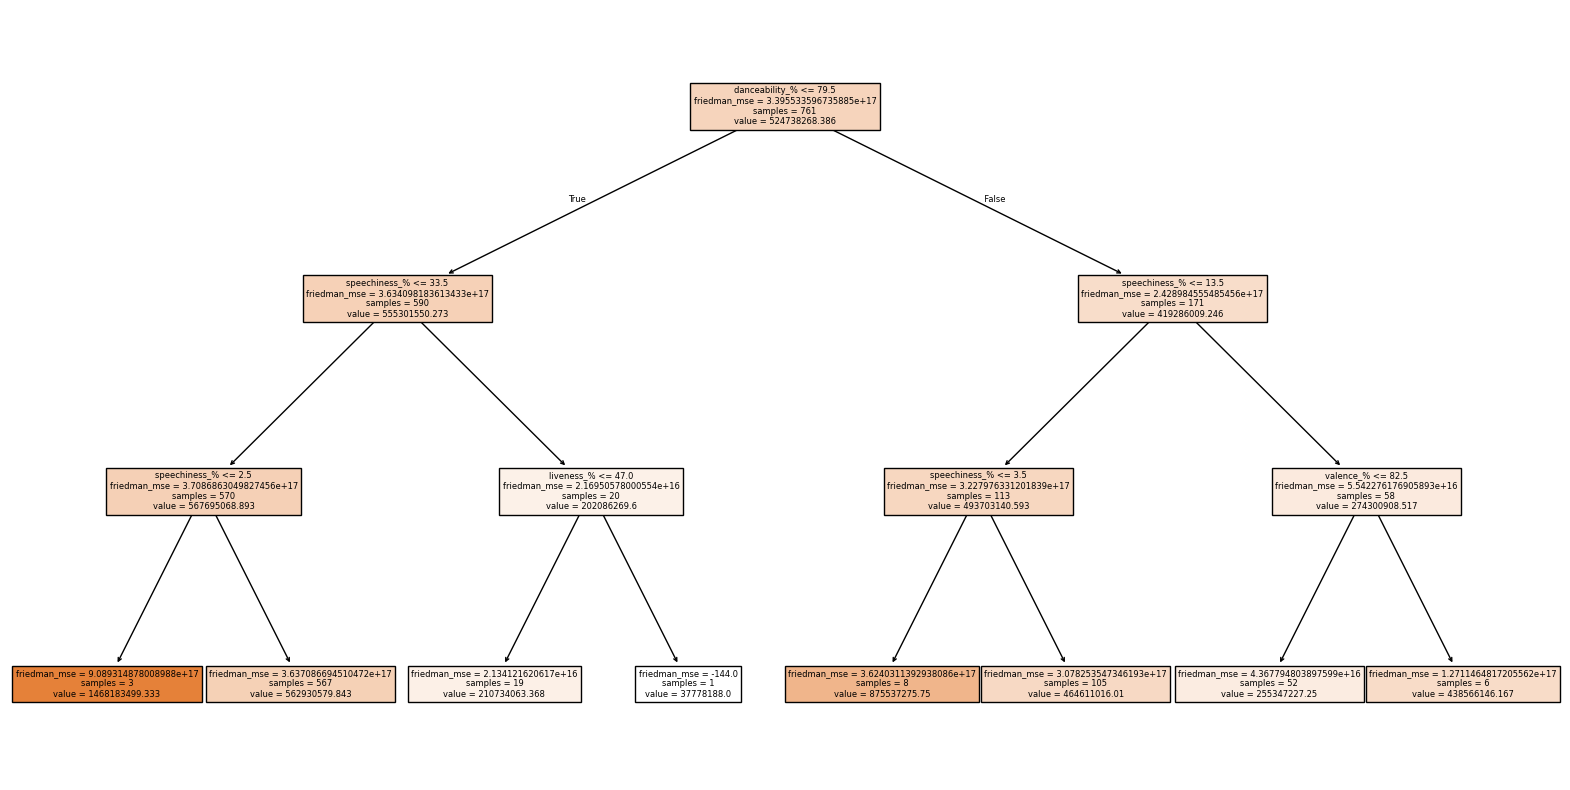

In [269]:
#Creating a visualization of actual vs predicted values
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

In [270]:
#Predict streams for the test set
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate RMSE score
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 2.5349018248099696e+17
Root Mean Squared Error: 503478085.4029269


#### Interpeting Result

On average our stream prediction was off by 503478085.4029269 streams. The model had a higher RMSE value than the simple tree model In this case, the grid searched model produced a higher RMSE than the simpler tree, likely because the optimization led to overfitting or a model which was too complex. While grid search optimizes performance across cross-validation folds, it can sometimes favor parameters that fit  subsets of data too closely and generalize poorly to only the test set. In contrast, the original model with a max_depth of 5 likely provided a better balance between bias and variance, capturing key relationships in the data without modeling noise. This showcases that a more complex or “optimized” model does not always provide better real-world results, especially when the data benefits from simpler structure and stronger regularization.


## Take Away

Through this project, we learned that among the three regression approaches tested, the simple tree-based model performed the best at predicting song streams. This indicates that relationships between musical features and popularity are likely nonlinear, meaning certain feature combinations influence success more than any single variable alone. The tree model’s structure allowed it to capture these complex interactions more effectively than linear or distance-based models like KNN. This finding suggests that decision trees and other non-linear methods are best for modeling human driven data such as music preferences, where behavior patterns rarely follow straight lines. Overall, the project reinforces the importance of trying multiple algorithms to uncover which best fits the underlying data relationships.

## Limitations

The dataset and feature set that was used for modeling had a lack of correlation between the features and the target value. This is imperative to linear and KNN models in the experiments preformed. The dataset also suffered in size only having 943 to begin with. With such a small dataset that is also focused on the year 2023, a dataset spanning a longer timeline with a larger compilation of songs would be needed to see if the results achieved are consistent. 


## Impact

This project demonstrates how regression analysis can translate creative data into actionable business insights within the music industry. By predicting a song’s stream count using measurable musical attributes, the models highlight which features most strongly influence listener engagement and popularity. The findings can guide record labels and streaming platforms in creating data driven marketing strategies. However, a growing reliance on predictive analytics also carries a major downside. If artists catering to streaming numbers, music could become increasingly formulaic and lose its artistic diversity and emotional depth. In that sense, while predictive models can improve profitability and exposure, they may also discourage genuine creativity, reducing music to a product designed for algorithms rather than an authentic product of art, nullyfying any streaming numbers.

## Refrences
* https://aws.amazon.com/what-is/linear-regression/#:~:text=solve%20complex%20problems.-,How%20does%20linear%20regression%20work?,calculate%20the%20linear%20regression%20equation.
* https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbors-knn-regression-with-scikit-learn/
* https://www.geeksforgeeks.org/machine-learning/python-decision-tree-regression-using-sklearn/
* https://www.geeksforgeeks.org/python/how-to-create-a-seaborn-correlation-heatmap-in-python/
* https://www.geeksforgeeks.org/machine-learning/hyperparameter-tuning/
* https://www.geeksforgeeks.org/data-visualization/data-visualization-with-python/
